In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")

In [3]:
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")

print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

Training dataset shape: (370515, 32)
Testing dataset shape: (123505, 32)
Training labels: (370515, 2)
Testing labels: (123505, 2)


In [4]:
y_train = y_train['label']
y_test = y_test['label']

In [5]:
print(f"Labels: {y_train.unique()}")

Labels: ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [6]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# training
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")

Training score: 0.928710038729876
Testing score: 0.9275818792761427


In [9]:
y_predicted = model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       0.98      0.99      0.98     97676
      normal       0.97      0.69      0.81     24482
       probe       0.16      0.99      0.28      1056
         r2l       0.43      0.44      0.43       279
         u2r       0.02      0.83      0.03        12

    accuracy                           0.93    123505
   macro avg       0.51      0.79      0.51    123505
weighted avg       0.97      0.93      0.94    123505



In [11]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

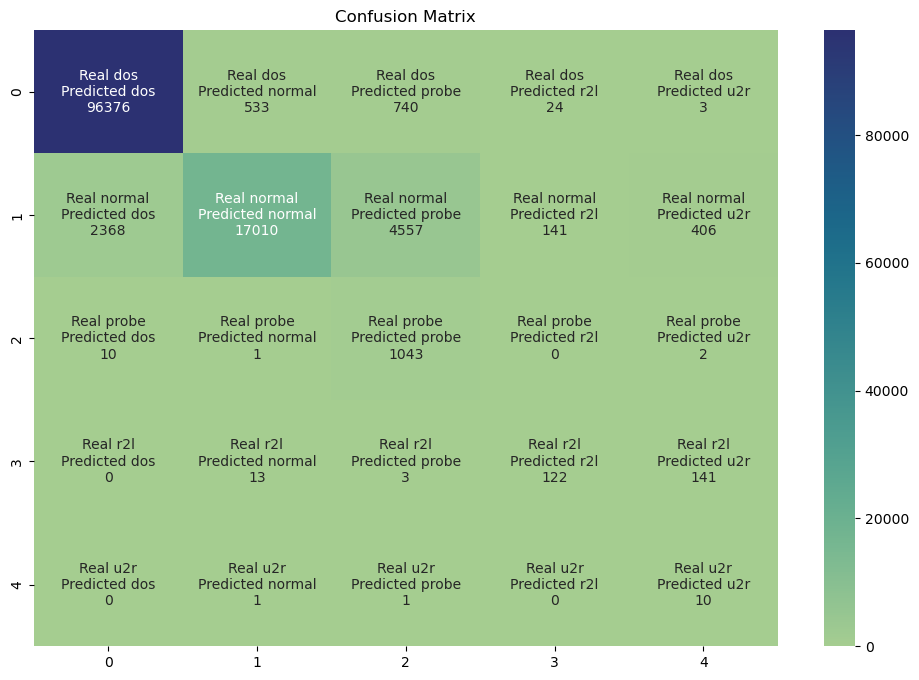

In [12]:
# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     